In [1]:
import glob
import os
import re

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Merge 12 months of sales data into one

In [2]:
# IMPORTANT: naming conventions - should not have named main dataframe to df


# from gpt, it works

# csv_files = glob.glob('Sales_Data/Sales_*.csv')
# print(csv_files)

# dataframes = []

# for file in csv_files:
#     df = pd.read_csv(file)
#     dataframes.append(df)
    
# merged_df = pd.concat(dataframes, ignore_index=True)
# merged_df.to_csv('merged_data.csv', index=False)

# merged_df.tail()


# from tutorial

path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

df_og = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    df_og = pd.concat([df_og, current_data])
    
df_og.to_csv("merged_data2.csv", index=False)

### Merged Dataframe

In [3]:
# backup df
df_backup = pd.read_csv('merged_data2.csv')

df_og = pd.read_csv('merged_data2.csv')

df_og.head()
# df_og.info()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data Cleaning

In [6]:
# df_og.loc[df_og['Order Date'].isnull()]

# nan_df = df_og[df_og.isnull().any(axis=1)]

# nan_df.head()

# drop nan values
df_og = df_og.dropna(how='all')

# Remove rows with placeholder values
df_og = df_og[df_og['Order Date'] != 'Order Date'] 

print(df_og.isnull().sum())
df_og.head()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Add month and sales column, visualize by monthly sales

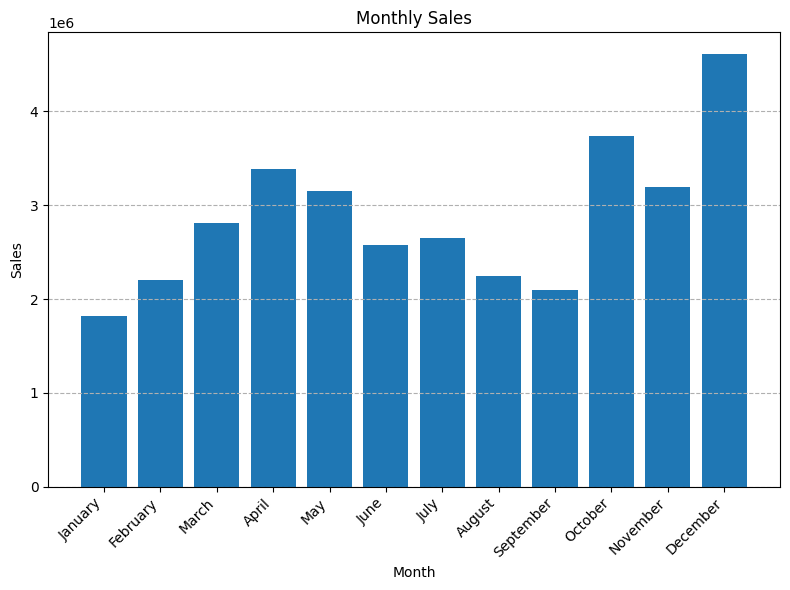

Month
January      1822256.73
February     2202022.42
March        2807100.38
April        3390670.24
May          3152606.75
June         2577802.26
July         2647775.76
August       2244467.88
September    2097560.13
October      3736726.88
November     3199603.20
December     4613443.34
Name: Sales, dtype: float64


In [9]:

# df_og['Month'] = df_og['Order Date'].dt.month
# df_og['Month'] = df_og['Order Date'].str[0:2]
# df_og['Month'] = df_og['Order Date'].astype('int64')

# reset index after setting
# df_og.reset_index(inplace=True)

# find specific element using loc and iloc
# df_og.loc[(df_og['Order ID']== '177057')]
# print(df.iloc[519])

# converted to datetime obj
df_og['Order Date'] = pd.to_datetime(df_og['Order Date'], format='%m/%d/%y %H:%M')

df_og['Month'] = pd.to_datetime(df_og['Order Date']).dt.month
df_og['Month'] = df_og['Order Date'].dt.strftime('%B')
# df.drop('Month', axis =1)

#also works
# df['Quantity Ordered'] = df['Quantity Ordered'].astype(float)
# df['Price Each'] = df['Price Each'].astype(float)

df_og['Quantity Ordered'] = pd.to_numeric(df_og['Quantity Ordered'])
df_og['Price Each'] = pd.to_numeric(df_og['Price Each'])

df_og['Sales'] = df_og['Quantity Ordered'] * df_og['Price Each']

# df_og.info()
# df_og.head()

# arrange month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
              'October','November','December']
df_og['Month'] = pd.Categorical(df_og['Month'], categories=month_order, ordered=True)

monthly_sales = df_og.groupby('Month')['Sales'].sum()

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the monthly sales data
ax.bar(monthly_sales.index, monthly_sales.values)
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
ax.set_title('Monthly Sales')

# Customize the appearance of the plot
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Adjust layout and spacing
plt.tight_layout()

# Display the plot
plt.show()

# for double checking data (IMPORTANT)
print(monthly_sales)

### Add city column, sales by city, visualize

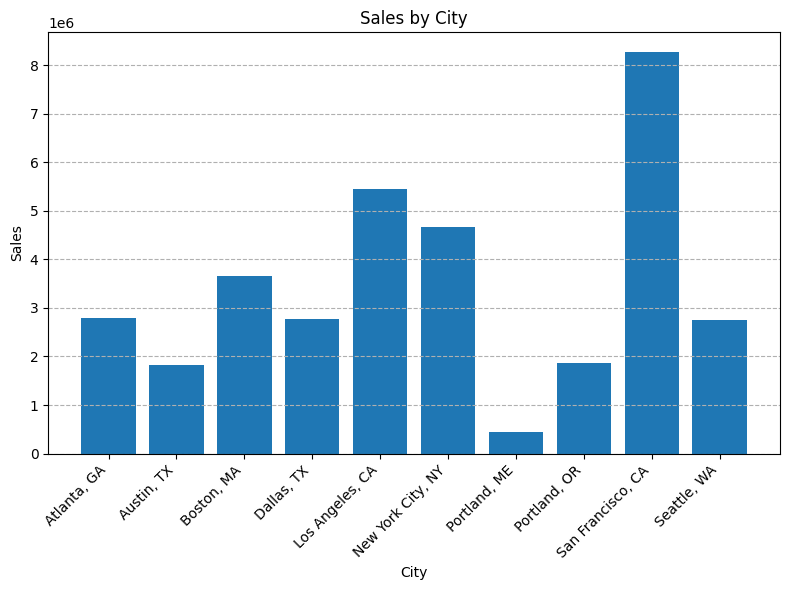

City
Atlanta, GA          2795498.58
Austin, TX           1819581.75
Boston, MA           3661642.01
Dallas, TX           2767975.40
Los Angeles, CA      5452570.80
New York City, NY    4664317.43
Portland, ME          449758.27
Portland, OR         1870732.34
San Francisco, CA    8262203.91
Seattle, WA          2747755.48
Name: Sales, dtype: float64


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA"


In [10]:

# str.strip() is not necessary, but is for removing leading or trailing whitespace
# df['City'] = df['Purchase Address'].str.split(',').str[1].str.strip()

# drop multiple columns
# df.drop(columns = 'CityState', inplace=True)
# df.drop(['City','State'], axis=1, inplace=True)

df_og['City'] = df_og['Purchase Address'].str.split(',').str[1:3].apply(lambda x: ', '.join([s.strip() for s in x]))

# remove postal code
df_og['City'] = df_og['City'].str.replace(r'\b\d+\b', '', regex=True).str.strip()

# since my index messed [0,2,3,4,5] 
# reset index after dropping rows
# df = df.reset_index(drop=True)


# visualizing
sales_by_city = df_og.groupby('City')['Sales'].sum()

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data
ax.bar(sales_by_city.index, sales_by_city.values)
ax.set_xlabel('City')
ax.set_ylabel('Sales')
ax.set_title('Sales by City')

# Customize the appearance of the plot, rotate city names 45 degrees
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Adjust layout and spacing
plt.tight_layout()

# Display the plot
plt.show()

# for double checking data (IMPORTANT)
print(sales_by_city)
df_og.head()

### Most sales by time of day

<function matplotlib.pyplot.show(close=None, block=None)>

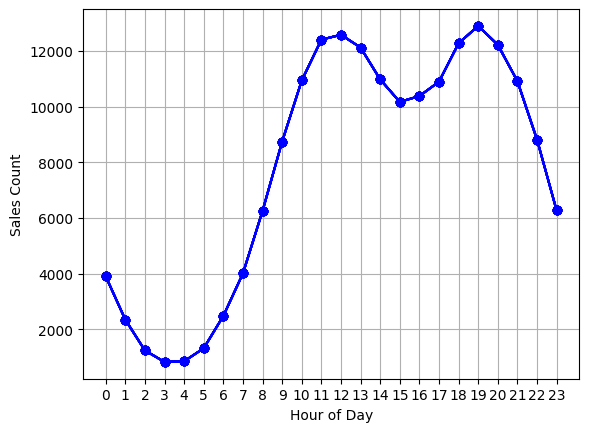

<Figure size 1200x600 with 0 Axes>

In [11]:
# df.drop(['Date','Time'], axis=1, inplace=True)

# df['Order Date'] = df['Order Date'].astype(str)
# df['Date'] = df['Order Date'].str.split(' ').str[0]
# df['Time'] = df['Order Date'].str.split(' ').str[1]

# df['Time'] = pd.to_datetime(df['Time'])
# df = df.sort_values('Time')

df_og['Hour'] = df_og['Order Date'].dt.hour

hours = df_og['Hour'].value_counts().sort_index().index.tolist()
plt.plot(hours, df_og.groupby(['Hour']).count(), marker='o', linestyle='-', color='blue')
plt.xticks(hours)
plt.xlabel('Hour of Day')
plt.ylabel('Sales Count')

plt.grid()
plt.figure(figsize=(12, 6))
plt.show

# from tutorial
# hours = [hour for hour, i in df.groupby(df['Hour'])]
# plt.plot(hours, df.groupby(['Hour']).count())
# plt.xticks(hours)
# plt.show

### Products mostly sold

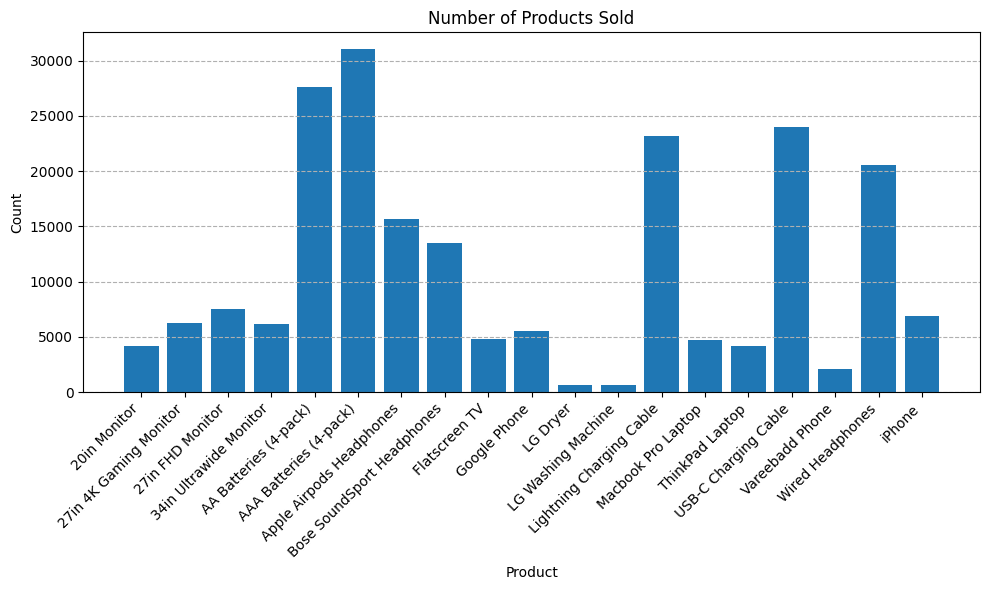

In [70]:
product_sold_count = df_og.groupby('Product')['Quantity Ordered'].sum()

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.bar(product_sold_count.index, product_sold_count.values, label='Number of Products Sold')

ax.set_xlabel('Product')
ax.set_ylabel('Count')
ax.set_title('Number of Products Sold')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Adjust layout and spacing
plt.tight_layout()

# Display the plot
plt.show()

### Product mostly sold and their prices

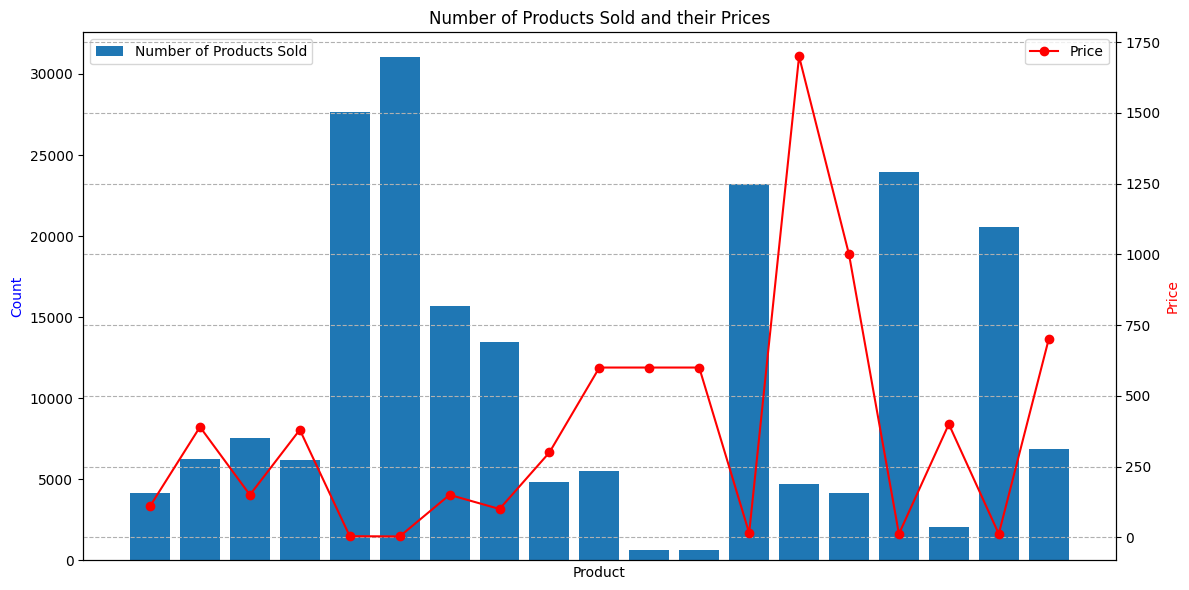

In [89]:

# prod = df_og['Product'].unique()
# print(prod)

# visualizing
product_sold_count = df_og.groupby('Product')['Quantity Ordered'].sum()
product_price = df_og.groupby('Product')['Price Each'].mean()

fig, ax = plt.subplots(figsize=(12, 6))
ax2 = ax.twinx()

# Plot the data as bar
ax.bar(product_sold_count.index, product_sold_count.values, label='Number of Products Sold')

# Plot the second set of values as a line
ax2.plot(product_price.index, product_price.values, marker='o', color='red', label='Price')

ax.set_xlabel('Product')
ax.set_ylabel('Count', color='blue')
ax2.set_ylabel('Price', color='red')
ax.set_title('Number of Products Sold and their Prices')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# cant fix shit
# ax.set_xticks(range(len(product_sold_count.index)))
# ax.set_xticklabels(product_sold_count.index, rotation=45, fontsize=8, ha='right')

ax2.set_xticks([]) 
plt.xticks(rotation=45,fontsize=8, ha='right')
plt.grid(axis='y', linestyle='--')

# Adjust layout and spacing
plt.tight_layout()

# Display the plot
plt.show()

### Prices of each product



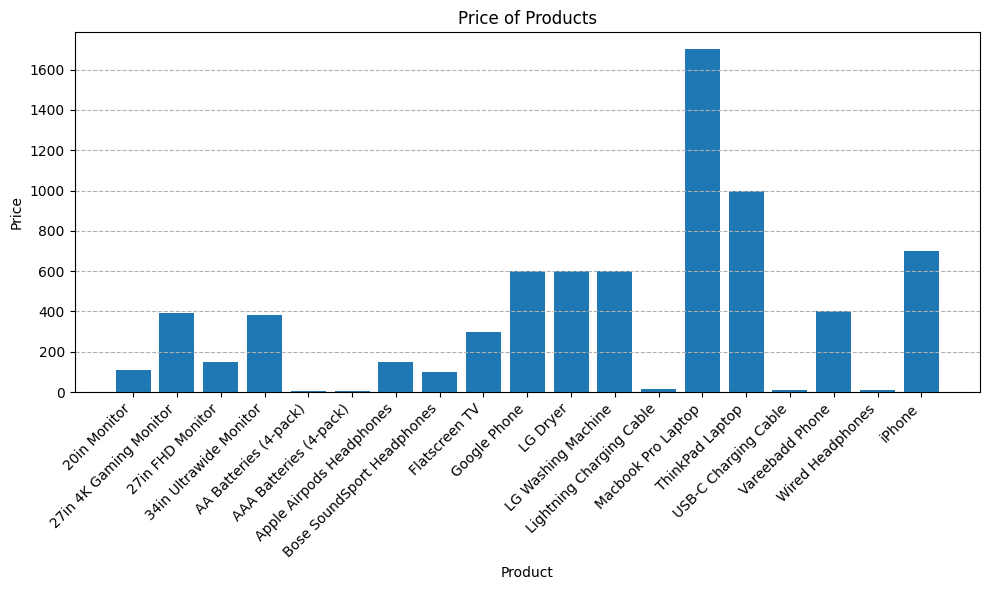

In [71]:

# visualizing
product_price = df_og.groupby('Product')['Price Each'].mean()

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.bar(product_price.index, product_price.values)
ax.set_xlabel('Product')
ax.set_ylabel('Price')
ax.set_title('Price of Products')

# Customize the appearance of the plot, rotate city names 45 degrees
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Adjust layout and spacing
plt.tight_layout()

# Display the plot
plt.show()

### Products most often sold together

C:\Users\jc\AppData\Local\Temp\ipykernel_7932\3258013705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped Products'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


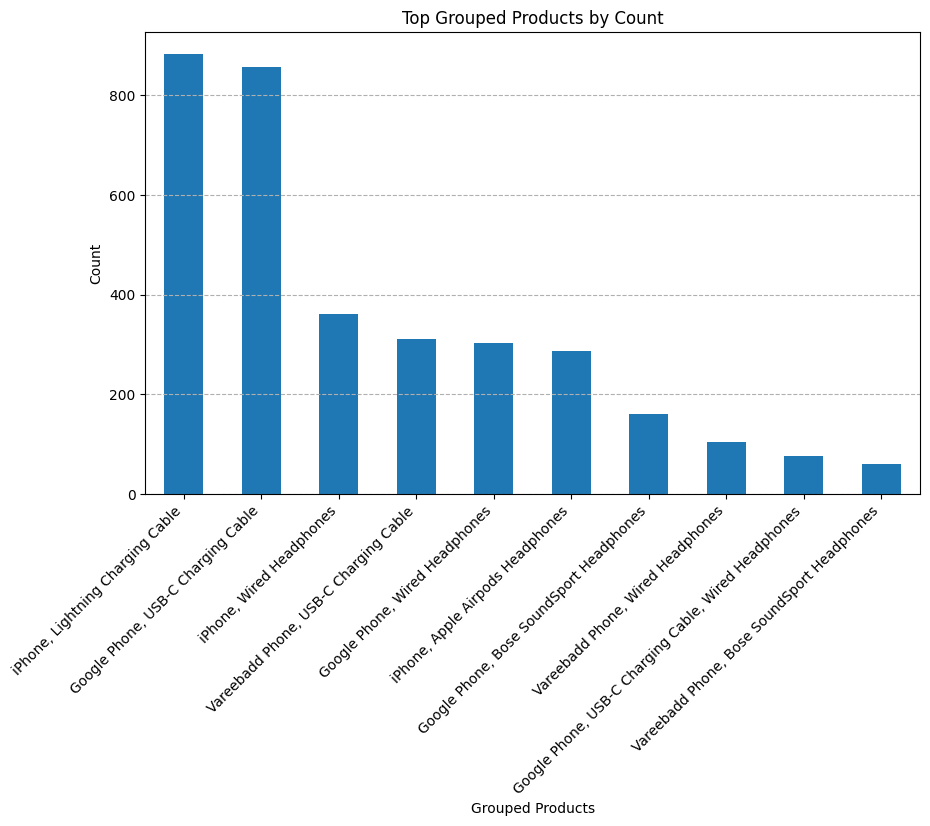

Grouped Products
iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: count, dtype: int64


In [82]:
df = df_og[df_og.duplicated('Order ID', keep=False)]

df['Grouped Products'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df = df[['Order ID', 'Grouped Products']].drop_duplicates()

grouped_counts = df['Grouped Products'].value_counts()
top_products = grouped_counts.head(10)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')

plt.xlabel('Grouped Products')
plt.ylabel('Count')
plt.title('Top Grouped Products by Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

df.head()
print(top_products)